In [6]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49
X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
#X = prosody_data.iloc[:, 4:].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=23, stratify=y)
X_train.shape

(612, 49)

In [27]:
#parallel cocordinate graph
# Import the library
import plotly.express as px

# Create the chart:
fig = px.parallel_coordinates(
    X, 
    color=prosody_data["Hired3C"], 
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=1)

# Hide the color scale that is useless in this case
fig.update_layout(coloraxis_showscale=False)

# Show the plot color_continuous_scale=px.colors.diverging.Tealrose,
fig.show()

In [29]:
df=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = prosody_data["Hired3C"],colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0,0 , 255)']],showscale = True),
        #line = dict(color = MRH,colorscale = 'Electric', showscale = True, cmin = -4000, cmax = -100),
         dimensions = list([
            dict(range = [min(df['duration']),max(df['duration'])], constraintrange = [1,2], label = 'Average Band1', values = df['avgBand1']),
            dict(range = [min(df['duration']),max(df['duration'])], label = 'avgVal2', values = df['avgVal2']),
            dict(range = [min(df['diffPitchMaxMode']),max(df['diffPitchMaxMode'])], label = 'diffPitchMaxMode', values = df['diffPitchMaxMode']),
            dict(range = [min(df['intensityMean']),max(df['intensityMean'])], label = 'intensityMean', values = df['intensityMean']),
            dict(range = [min(df['intensityMin']),max(df['intensityMin'])], label = 'intensityMin', values = df['intensityMin']),
            dict(range = [min(df['intensityQuant']),max(df['intensityQuant'])], label = 'intensityQuant', values = df['intensityQuant']),
            dict(range = [min(df['intensitySD']),max(df['intensitySD'])], label = 'intensitySD', values = df['intensitySD']),
            dict(range = [min(df['mean_pitch']),max(df['mean_pitch'])], label = 'mean_pitch', values = df['mean_pitch']),
            dict(range = [min(df['pitchUvsVRatio']),max(df['pitchUvsVRatio'])], label = 'pitchUvsVRatio', values = df['pitchUvsVRatio']),
            dict(range = [min(df['pitch_abs']),max(df['pitch_abs'])], label = 'pitch_abs', values = df['pitch_abs']),
            dict(range = [min(df['pitch_quant']),max(df['pitch_quant'])], label = 'pitch_quant', values = df['pitch_quant']),              
            dict(range = [min(df['pitch_sd']),max(df['pitch_sd'])], label = 'pitch_sd', values = df['pitch_sd']),            
            dict(range = [min(df['power']),max(df['power'])], label = 'Power', values = df['power'])
        ])
       
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [4]:
imDict={}
print(len(prosody_data))
dim=(7,7)
num_classes = 3
x_imageSet=np.empty((len(prosody_data),dim[0],dim[1]))

y_Set=np.empty((len(prosody_data),1))



680


In [5]:
for index, row in X.iterrows():
    print(row)
    mat = np.reshape(row.to_numpy(),(dim[0],dim[1]))
    print(row.to_numpy())
    x_imageSet[index]=mat
    y_Set[index] = y[index]
    imDict[index]=(x_imageSet[index],y_Set[index])
#imDict
   


duration              51.952125
energy                 0.015331
power                  0.000295
min_pitch             75.232657
max_pitch            396.635613
mean_pitch           127.989222
pitch_sd              27.821528
pitch_abs            217.628692
pitch_quant          119.690367
pitchUvsVRatio         0.773830
Time:8                51.926063
iDifference            3.969125
diffPitchMaxMin      321.402957
diffPitchMaxMean     268.646391
diffPitchMaxMode     276.945246
intensityMin          35.146923
intensityMax          72.867806
intensityMean         58.684285
intensitySD            7.887426
intensityQuant        54.273029
diffIntMaxMin         37.720883
diffIntMaxMean        14.183521
diffIntMaxMode        18.594777
avgVal1              626.471748
avgVal2             1812.870522
avgVal3             2726.754872
avgBand1             369.513757
avgBand2             460.554585
avgBand3             490.547548
fmean1               626.471748
fmean2              1812.870522
fmean3  

 3.39200000e+00]
duration              67.718625
energy                 0.004814
power                  0.000071
min_pitch             72.422118
max_pitch            362.773823
mean_pitch           113.824174
pitch_sd              57.678001
pitch_abs            244.406249
pitch_quant           92.841580
pitchUvsVRatio         3.064865
Time:8                67.690562
iDifference          188.846726
diffPitchMaxMin      290.351705
diffPitchMaxMean     248.949649
diffPitchMaxMode     269.932243
intensityMin          36.016042
intensityMax          68.776452
intensityMean         52.497863
intensitySD            6.259387
intensityQuant        47.882895
diffIntMaxMin         32.760410
diffIntMaxMean        16.278589
diffIntMaxMode        20.893557
avgVal1              705.417967
avgVal2             1837.749133
avgVal3             2870.279718
avgBand1             529.979419
avgBand2             640.077558
avgBand3             738.888040
fmean1               705.417967
fmean2              183

Name: 261, dtype: float64
[2.64758750e+01 2.36586900e-03 8.94000000e-05 5.93293414e+01
 3.63133525e+02 2.33783082e+02 4.59908728e+01 4.39747044e+02
 2.38984697e+02 4.90417136e-01 2.64504375e+01 4.72165247e+00
 3.03804184e+02 1.29350443e+02 1.24148828e+02 3.47367071e+01
 6.65634304e+01 5.35009753e+01 6.02131758e+00 5.05493349e+01
 3.18267234e+01 1.30624551e+01 1.60140956e+01 6.71567931e+02
 1.92936017e+03 2.88425414e+03 4.62378294e+02 6.46470916e+02
 5.82800785e+02 6.71567931e+02 1.92936017e+03 2.88425414e+03
 2.87291886e+00 4.29480624e+00 3.43368090e+02 3.83160372e+02
 3.58853652e+02 1.11588812e+00 1.04509901e+00 2.43200000e-02
 1.67820000e-01 1.31500000e-02 4.26497800e-03 2.71180000e-01
 6.60000000e+01 2.84580000e-01 5.63698000e-04 2.80000000e+01
 8.00000000e-01]
duration              33.858562
energy                 0.003160
power                  0.000093
min_pitch             64.836338
max_pitch            317.310120
mean_pitch           227.232437
pitch_sd              40.026438
p

duration              55.484854
energy                 0.005807
power                  0.000105
min_pitch             75.029011
max_pitch            327.522446
mean_pitch           122.848695
pitch_sd              28.441455
pitch_abs            167.797874
pitch_quant          115.040218
pitchUvsVRatio         1.099583
Time:8                55.458052
iDifference           77.377630
diffPitchMaxMin      252.493435
diffPitchMaxMean     204.673751
diffPitchMaxMode     212.482229
intensityMin          35.685570
intensityMax          71.395875
intensityMean         54.180969
intensitySD            6.981694
intensityQuant        50.680637
diffIntMaxMin         35.710305
diffIntMaxMean        17.214906
diffIntMaxMode        20.715237
avgVal1              654.448767
avgVal2             1810.500787
avgVal3             2840.111269
avgBand1             485.556424
avgBand2             604.129151
avgBand3             603.338119
fmean1               654.448767
fmean2              1810.500787
fmean3  

Name: 475, dtype: float64
[3.54745000e+01 4.22380400e-03 1.19066000e-04 7.85356215e+01
 3.62843688e+02 2.07680344e+02 4.08517383e+01 2.84564342e+02
 2.04027685e+02 5.61233480e-01 3.54466250e+01 9.57955047e+00
 2.84308067e+02 1.55163344e+02 1.58816003e+02 3.52695711e+01
 6.61483629e+01 5.47444568e+01 6.48201454e+00 5.22145384e+01
 3.08787918e+01 1.14039061e+01 1.39338245e+01 6.40616786e+02
 1.81477764e+03 2.82961442e+03 4.06820716e+02 5.64767415e+02
 5.94165838e+02 6.40616786e+02 1.81477764e+03 2.82961442e+03
 2.83285996e+00 4.41701573e+00 2.80272776e+02 3.48465892e+02
 3.52094974e+02 1.24330981e+00 1.25625820e+00 1.94100000e-02
 1.59420000e-01 1.06300000e-02 4.80329900e-03 3.18280000e-01
 8.20000000e+01 3.06180000e-01 4.40529000e-04 3.60000000e+01
 8.53333333e-01]
duration              37.702354
energy                 0.003452
power                  0.000092
min_pitch             76.531505
max_pitch            398.317614
mean_pitch           202.341721
pitch_sd              43.629209
p

Name: 562, dtype: float64
[1.20067604e+02 1.66129550e-02 1.38363000e-04 7.42721444e+01
 3.96420005e+02 1.90626939e+02 3.24804772e+01 2.01432059e+02
 1.82323442e+02 7.97394429e-01 1.20040052e+02 1.21013489e+02
 3.22147860e+02 2.05793065e+02 2.14096563e+02 3.49960717e+01
 6.91632470e+01 5.53922262e+01 7.50553385e+00 5.09837084e+01
 3.41671753e+01 1.37710209e+01 1.81795387e+01 6.46330211e+02
 1.86118311e+03 2.93346306e+03 3.67549628e+02 5.37198748e+02
 5.76082022e+02 6.46330211e+02 1.86118311e+03 2.93346306e+03
 2.87961646e+00 4.53864451e+00 2.68777386e+02 3.58527364e+02
 3.26575159e+02 1.33391938e+00 1.21503957e+00 2.04200000e-02
 1.73420000e-01 1.08200000e-02 5.24396000e-03 3.98900000e-01
 2.43000000e+02 4.35560000e-01 1.49745000e-04 1.09000000e+02
 4.54400000e+00]
duration              54.767667
energy                 0.020656
power                  0.000377
min_pitch             86.647568
max_pitch            399.010473
mean_pitch           220.728705
pitch_sd              55.347237
p

Name: 657, dtype: float64
[3.10995625e+01 4.20085200e-03 1.35078000e-04 8.01859230e+01
 3.92551683e+02 2.39689694e+02 4.20842252e+01 3.45367079e+02
 2.37702702e+02 5.64735516e-01 3.10716563e+01 1.46870005e+02
 3.12365760e+02 1.52861989e+02 1.54848981e+02 3.57512155e+01
 6.73340657e+01 5.52916155e+01 7.39672651e+00 5.24619851e+01
 3.15828502e+01 1.20424502e+01 1.48720805e+01 6.93294757e+02
 1.87268232e+03 2.89318622e+03 4.68670382e+02 5.53482337e+02
 7.15898340e+02 6.93294757e+02 1.87268232e+03 2.89318622e+03
 2.70113440e+00 4.17309693e+00 3.27946611e+02 3.47182139e+02
 3.83137968e+02 1.05865445e+00 1.16829373e+00 1.85600000e-02
 1.59060000e-01 9.92000000e-03 4.15942600e-03 3.07790000e-01
 5.40000000e+01 3.46260000e-01 5.03778000e-04 2.10000000e+01
 1.57866667e+00]
duration              20.584958
energy                 0.001920
power                  0.000093
min_pitch             64.337122
max_pitch            371.066760
mean_pitch           254.871233
pitch_sd              50.220251
p

In [7]:

new_im_Size=(50,50)
new_imageDict = {}
for index in imDict:
    new_image = np.zeros(new_im_Size)
    start=round((new_im_Size[0]-dim[0])/2)
    end = start+ dim[0]
    new_image[start:end,start:end]=imDict[index][0]
    new_imageDict[index]=(new_image,imDict[index][1])

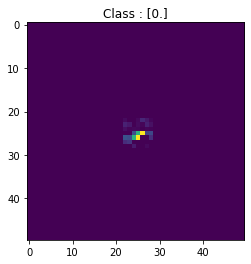

In [8]:

plt.title("Class : {}".format(new_imageDict[200][1]))
plt.imshow(new_imageDict[200][0])

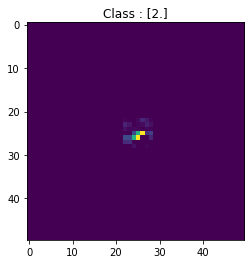

In [9]:
plt.title("Class : {}".format(new_imageDict[209][1]))
plt.imshow(new_imageDict[209][0])


Text(0.5, 1.0, 'Class : [1.]')

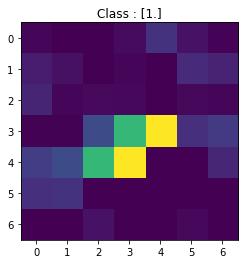

In [10]:
plt.imshow(imDict[0][0])
plt.title("Class : {}".format(y_Set[0]))

In [11]:
def load_data(imDict,train, test):
    train_len = len(train)
    test_len =  len(test)
    x_trainImSet=np.empty((train_len,new_im_Size[0],new_im_Size[1]))
    x_testImSet=np.empty((test_len,new_im_Size[0],new_im_Size[1]))
    y_trainSet=np.zeros(train_len)
    y_testSet=np.zeros(test_len)
    for trnPi in range(train_len):
        (x_trainImSet[trnPi],y_trainSet[trnPi])=train[trnPi]
    
    for testPi in range(test_len):
        (x_testImSet[testPi],y_testSet[testPi])=test[testPi]
    
    x_trainImSet= x_trainImSet.astype('float32')
    x_testImSet= x_testImSet.astype('float32')
   
    
    # convert class vectors to matrices as binary
    
    y_trainSet= tensorflow.keras.utils.to_categorical(y_trainSet, num_classes)
    y_testSet= tensorflow.keras.utils.to_categorical(y_testSet, num_classes)
    
   
    return (x_trainImSet,y_trainSet), (x_testImSet,y_testSet)

def load_data(imDict,train, test):
    train_len = len(train)
    test_len =  len(test)
    x_trainImSet=np.empty((train_len,dim[0],dim[1]))
    x_testImSet=np.empty((test_len,dim[0],dim[1]))
    y_trainSet=np.zeros(train_len)
    y_testSet=np.zeros(test_len)
    for trnPi in range(train_len):
        (x_trainImSet[trnPi],y_trainSet[trnPi])=train[trnPi]
    
    for testPi in range(test_len):
        (x_testImSet[testPi],y_testSet[testPi])=test[testPi]
    
    x_trainImSet= x_trainImSet.astype('float32')
    x_testImSet= x_testImSet.astype('float32')
   
    
    # convert class vectors to matrices as binary
    
    y_trainSet= tensorflow.keras.utils.to_categorical(y_trainSet, num_classes)
    y_testSet= tensorflow.keras.utils.to_categorical(y_testSet, num_classes)
    
   
    return (x_trainImSet,y_trainSet), (x_testImSet,y_testSet)

In [12]:
batch_size = 5
epochs = 10


In [13]:


import datetime
start = datetime.datetime.now()

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(new_im_Size[0],new_im_Size[1],1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       7

skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=12)

for train_index, test_index in skf.split(np.zeros(len(y)), y):
    train=[imDict[indx] for indx in train_index]
   
    test = [imDict[indx] for indx in test_index]
    (X_train,y_train) , (X_test,y_test) = load_data(imDict,train,test)
    X_train= X_train.reshape(len(X_train),dim[0],dim[1],1)
    X_test=X_test.reshape(len(X_test),dim[0],dim[1],1)
    print(X_test.shape)
    fashion_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))
    

In [14]:
#new_imageDict
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=12)
cvscores =[]
loss = []
for train_index, test_index in skf.split(np.zeros(len(y)), y):
    train=[new_imageDict[indx] for indx in train_index]
   
    test = [new_imageDict[indx] for indx in test_index]
    (X_train,y_train) , (X_test,y_test) = load_data(new_imageDict,train,test)
    X_train= X_train.reshape(len(X_train),new_im_Size[0],new_im_Size[1],1)
    X_test=X_test.reshape(len(X_test),new_im_Size[0],new_im_Size[1],1)
   
    fashion_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))
    scores = fashion_model.evaluate(X_test, y_test,batch_size=batch_size, verbose=0)
    #print("%s: %.2f%%" % (fashion_model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    loss.append(scores[0] * 100)
print("CV Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("Mean Loss : %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))


Epoch 1/10
109/109 [==============================] - 2s 22ms/step - loss: 8.4190 - accuracy: 0.3621 - val_loss: 1.5505 - val_accuracy: 0.3162
Epoch 2/10
109/109 [==============================] - 2s 19ms/step - loss: 1.1766 - accuracy: 0.4154 - val_loss: 1.1071 - val_accuracy: 0.3382
Epoch 3/10
109/109 [==============================] - 2s 21ms/step - loss: 1.0754 - accuracy: 0.4228 - val_loss: 1.0920 - val_accuracy: 0.4044
Epoch 4/10
109/109 [==============================] - 3s 31ms/step - loss: 1.0631 - accuracy: 0.4246 - val_loss: 1.0880 - val_accuracy: 0.3897
Epoch 5/10
109/109 [==============================] - 3s 29ms/step - loss: 1.0498 - accuracy: 0.4559 - val_loss: 1.1368 - val_accuracy: 0.4485
Epoch 6/10
109/109 [==============================] - 3s 29ms/step - loss: 1.0193 - accuracy: 0.4853 - val_loss: 1.0888 - val_accuracy: 0.4485
Epoch 7/10
109/109 [==============================] - 3s 31ms/step - loss: 1.0498 - accuracy: 0.4871 - val_loss: 1.0478 - val_accuracy: 0.5515